# Kiva Crowd-Funding Data Visualization

In [1]:
import plotly.plotly as py

from narcos.kiva_data import KivaData
from narcos.map import plot_map
from narcos.word_cloud import draw_wordcloud
from narcos.country_by_loan import plot_country_by_loan_amount
from narcos.numloanspermonth import numloansmonth

kiva_data = KivaData(use_sample=True)
loan_data = kiva_data.loan_data

## numloanspermonth

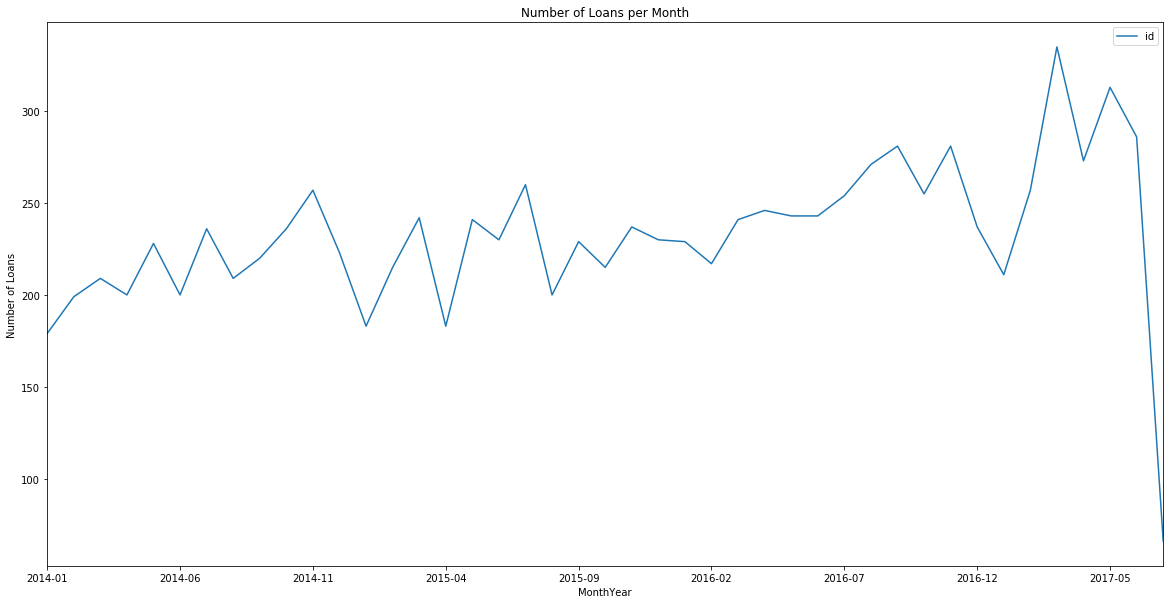

In [2]:
numloansmonth(loan_data)

## Wordcloud

Wordcloud shows how 

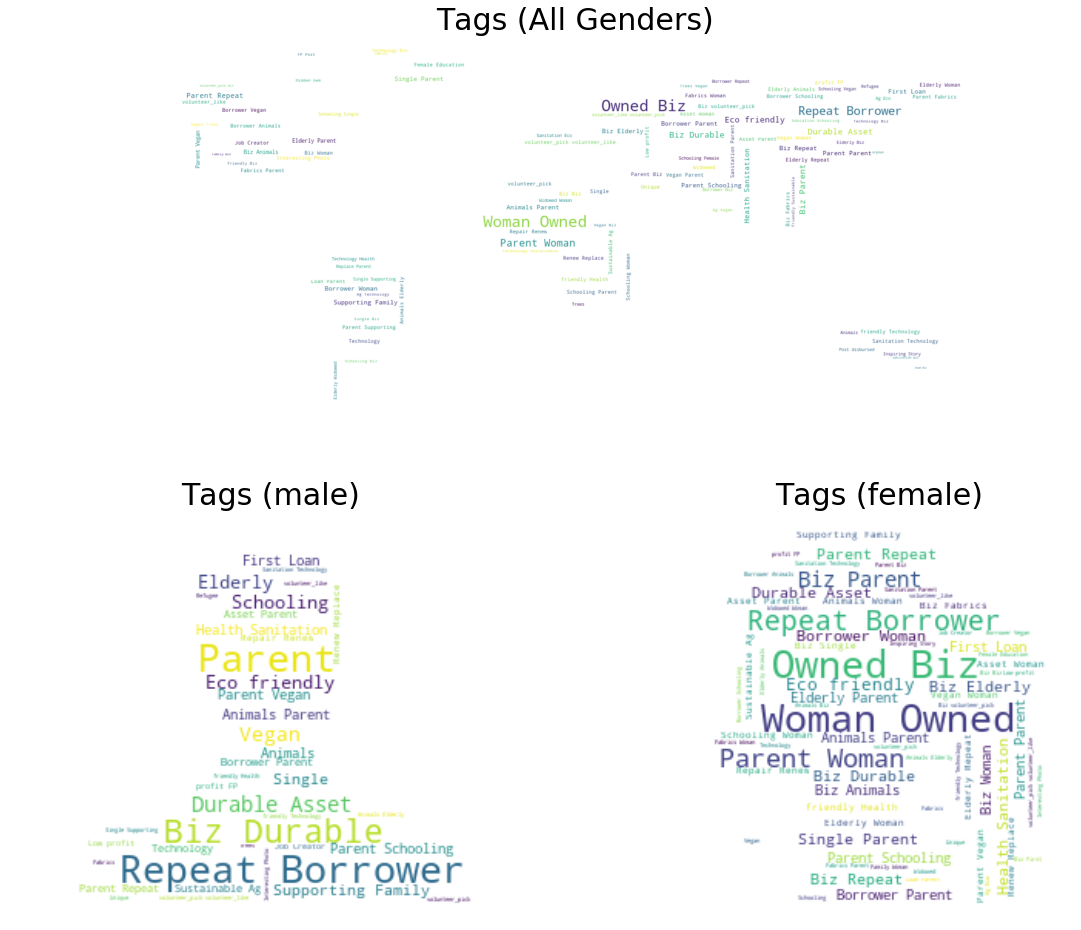

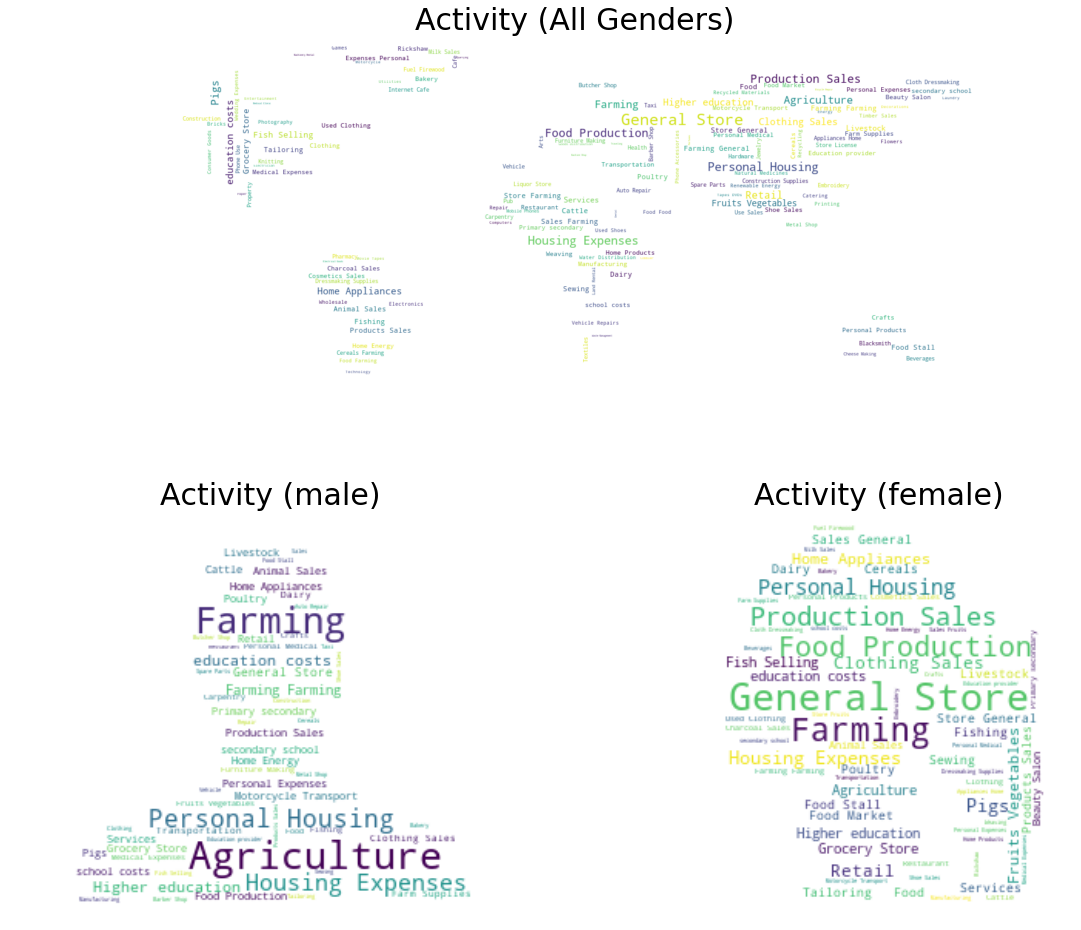

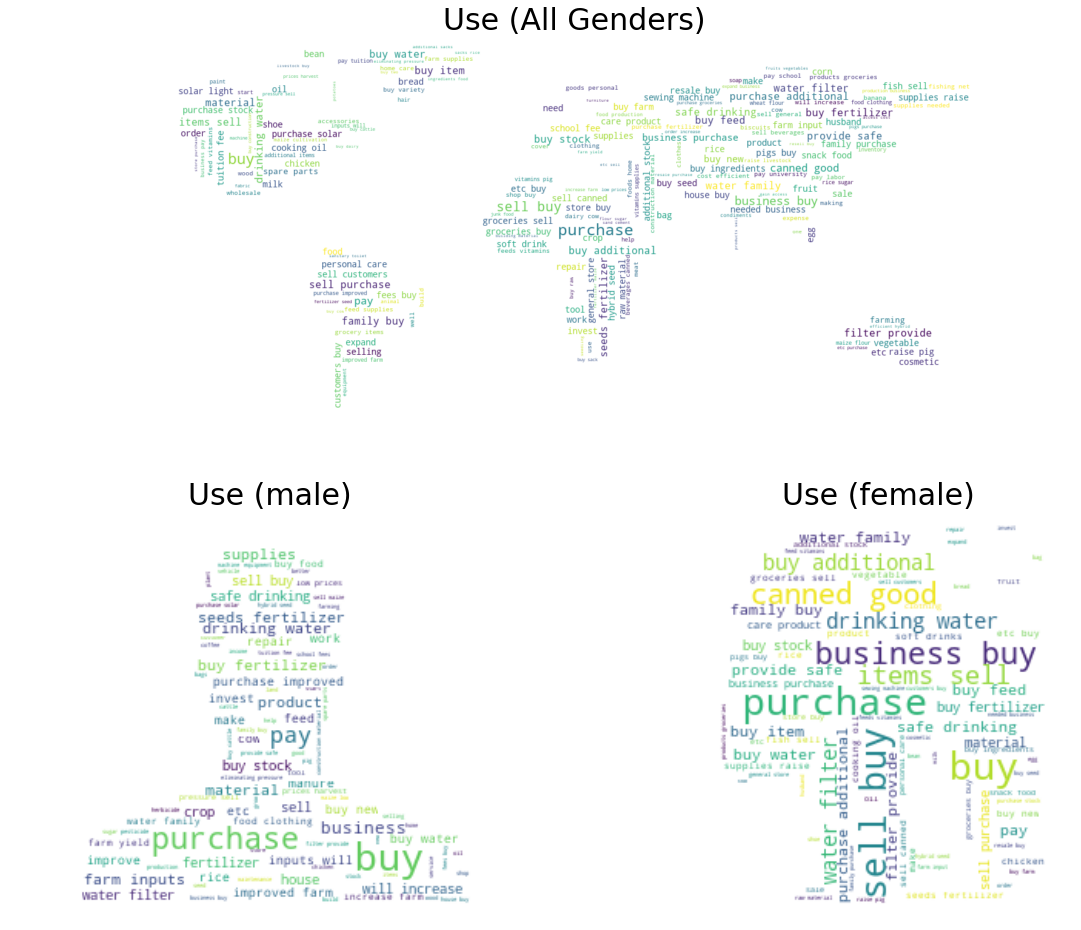

In [3]:
draw_wordcloud(loan_data)

## Map

In [4]:
py.iplot(plot_map(loan_data), validate=False, filename='d3-world-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~feng443/0 or inside your plot.ly account where it is named 'd3-world-map'


## Country by Loan

       country  loan_amount  loan_ranked
0       Belize       1375.0          2.0
1        Benin       3925.0          4.0
2      Somalia       1500.0          3.0
3  South Sudan        825.0          1.0


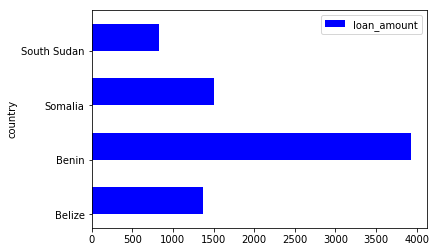

In [5]:
plot_country_by_loan_amount(loan_data)